<a href="https://colab.research.google.com/github/hamagami/is2021/blob/main/NN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple regression with Keras NN framework

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# sample data generator


In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


## case1  the number of data is 30 

In [90]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

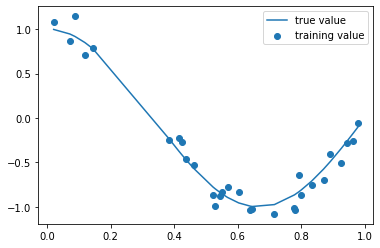

In [96]:
plt.plot(X,true_fun(X),label="true value")
plt.scatter(X,y,label="training value")
plt.legend()
plt.show()

In [77]:
# Build the model.
model = Sequential([
  Dense(256, activation='tanh', input_dim=1),
  Dense(256, activation='tanh'),
  Dense(1),
])


In [78]:
model.compile(
  optimizer='sgd',
  loss='mse',
  metrics=['mae', 'mse'])

In [79]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               512       
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dense_26 (Dense)            (None, 1)                 257       
                                                                 
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


In [80]:
history=model.fit(
  X.T,
  y.T,
  epochs=10000,
  batch_size=100,
  verbose=0
)

In [81]:
predictions = model.predict(np.arange(0,1,0.01))

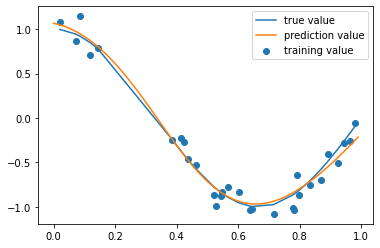

In [82]:
plt.plot(X,true_fun(X),label="true value")
plt.plot(np.arange(0,1,0.01), predictions, label="prediction value")
plt.scatter(X,y,label="training value")
plt.legend()
plt.show()
# you can see the training is successful. 

## case2: overfitting

Overfitting is more likely to occur when the number of data samples is small. Let's set the number of samples to 5.

In [123]:
np.random.seed(9)
n_samples = 5
sX = np.sort(np.random.rand(n_samples))
sy = true_fun(sX) + np.random.randn(n_samples) * 0.1

In [124]:
# Build the model.
model = Sequential([
  Dense(256, activation='tanh', input_dim=1),
  Dense(256, activation='tanh'),
  Dense(1),
])


In [125]:
model.compile(
  optimizer='sgd',
  loss='mse',
  metrics=['mae', 'mse'])

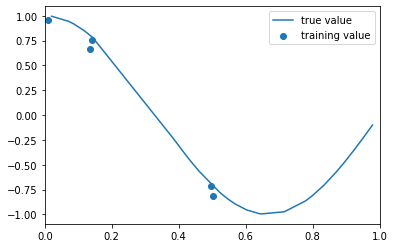

In [126]:
plt.xlim([0,1])
plt.plot(X,true_fun(X),label="true value")
plt.scatter(sX,sy,label="training value")
plt.legend()
plt.show()

In [127]:
history=model.fit(
  sX.T,
  sy.T,
  epochs=10000,
  batch_size=100,
  verbose=0
)

In [128]:
predictions = model.predict(np.arange(0,1,0.01))

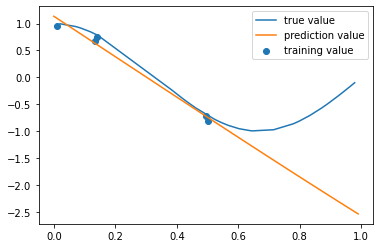

In [129]:
plt.plot(X,true_fun(X),label="true value")
plt.plot(np.arange(0,1,0.01), predictions, label="prediction value")
plt.scatter(sX,sy,label="training value")
plt.legend()
plt.show()
## Oops... the prediction values are indeed close to the training samples, but they are far from the true data.
## If the model is too complex for such a small amount of training data, overtraining can easily occur.